In [13]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Carregando imagens

In [15]:
(img_treino, labels_treino), (img_teste, label_teste) = datasets.cifar10.load_data()

In [16]:
nome_classes = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Pré-Processamento e Visualização das Imagens

In [17]:
#Normaliza os valores dos pixels para que os dados fiquem na mesma escala
img_treino = img_treino / 255.0
img_teste = img_teste / 255.0

In [18]:
def visualizar_imagens(imgs, labels):
    plt.figure(figsize=(14, 6))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imgs[i], cmap=plt.cm.binary)
        plt.xlabel(nome_classes[labels[i][0]])
    plt.show()    

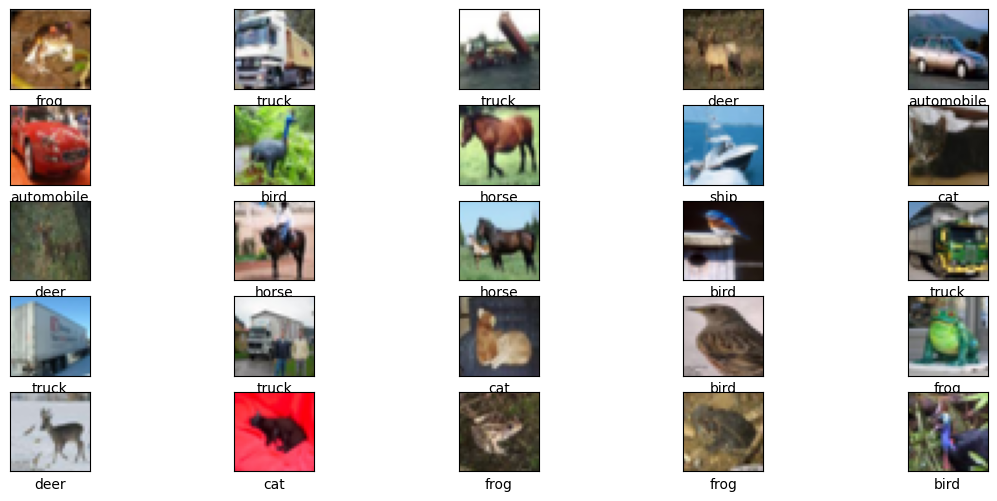

In [19]:
visualizar_imagens(img_treino, labels_treino)

In [20]:
#Cria objeto de sequencia de camadas
modelo = models.Sequential()

In [21]:
#Adiciona o primeiro bloco de convolução e max (camada de entrada)
modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo.add(layers.MaxPooling2D((2, 2)))

c:\Users\alexandre.lima_ipnet\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
#Adiciona o segundo bloco de convolução e max (camada intermediaria) 
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

In [23]:
#Adiciona o terceiro bloco de convolução e max pooling (camada intermediaria) 
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

In [24]:
#Adiciona o primeiro bloco de convolução e max 
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(10, activation='softmax'))

In [25]:
#Sumario do modelo
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
%%time
history = modelo.fit(img_treino, labels_treino, epochs=10, validation_data=(img_teste, label_teste))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3357 - loss: 1.7937 - val_accuracy: 0.5280 - val_loss: 1.3044
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5548 - loss: 1.2421 - val_accuracy: 0.5950 - val_loss: 1.1564
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6192 - loss: 1.0806 - val_accuracy: 0.6247 - val_loss: 1.0776
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6570 - loss: 0.9753 - val_accuracy: 0.6585 - val_loss: 0.9822
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6824 - loss: 0.8987 - val_accuracy: 0.6552 - val_loss: 0.9971
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7053 - loss: 0.8365 - val_accuracy: 0.6812 - val_loss: 0.9244
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7228 - loss: 0.7904 - val_accuracy: 0.6726 - val_loss: 0.9553
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7350 - 

### Avaliação do modelo

In [28]:
erro_teste, acc_teste = modelo.evaluate(img_teste, label_teste, verbose = 2)

313/313 - 1s - 3ms/step - accuracy: 0.7064 - loss: 0.8562


In [30]:
print(f'\nAcurácia com Dados de Teste:{acc_teste:.2f}')


Acurácia com Dados de Teste:0.71


### Deploy do modelo

In [31]:
# Carrega uma nova imagem
new_img = Image.open('img/nova_imagem.jpg')

In [32]:
# Dimensões da imagem (em pixels)
new_img.size

(1919, 1199)

In [33]:
# Obtém a largura e a altura da imagem
width = new_img.width
height = new_img.height

In [34]:
print(f'A largura da imagem é: {width}')
print(f'A altura da imagem é: {height}')

A largura da imagem é: 1919
A altura da imagem é: 1199


In [36]:
new_img.size

(32, 32)

In [35]:
# Redimensiona para 32x32 pixels
new_img = new_img.resize((32, 32))

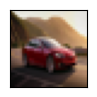

In [37]:
#Exibindo a imagem
plt.figure(figsize=(1, 1))
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
#Converte a imagem para um array Numpy e normaliza
array_img = np.array(new_img) / 255.0
array_img

array([[[0.35686275, 0.30588235, 0.17254902],
        [0.78823529, 0.77647059, 0.71764706],
        [0.89803922, 0.89803922, 0.87058824],
        ...,
        [0.89411765, 0.89019608, 0.8745098 ],
        [0.89411765, 0.89019608, 0.8745098 ],
        [0.89019608, 0.88627451, 0.87058824]],

       [[0.20784314, 0.16862745, 0.05882353],
        [0.40784314, 0.35294118, 0.22352941],
        [0.83137255, 0.81960784, 0.76862745],
        ...,
        [0.89803922, 0.89411765, 0.87843137],
        [0.89411765, 0.89019608, 0.8745098 ],
        [0.89019608, 0.88627451, 0.87058824]],

       [[0.1254902 , 0.09411765, 0.05882353],
        [0.21176471, 0.16470588, 0.0627451 ],
        [0.4       , 0.34509804, 0.2       ],
        ...,
        [0.89803922, 0.89411765, 0.87843137],
        [0.89803922, 0.89411765, 0.87843137],
        [0.89411765, 0.89019608, 0.8745098 ]],

       ...,

       [[0.04313725, 0.04313725, 0.04313725],
        [0.04705882, 0.04705882, 0.04705882],
        [0.05490196, 0

In [42]:
#Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
array_img = np.expand_dims(new_img, axis=0)

In [43]:
# Previsões
previsoes = modelo.predict(array_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [44]:
print(previsoes)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [45]:
#Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classes_prevista = nome_classes[classe_prevista]

In [46]:
print(f'A nova imagem foi classificada como:{nome_classes_prevista}')

A nova imagem foi classificada como:automobile


### FIM